In [1]:
import importlib

import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
import aux_Func as aux_Func
from sklearn.model_selection import train_test_split

Definimos las constantes

In [2]:
# MACROS
NDATASETS = 50
N_TRAIN_SAMPLES = 15
NCVALUES = 20

Creamos las listas que usaremos a la hora de generar los datos

In [3]:
DataMatrix = [ []*2 for i in range(NDATASETS)]
matrixDatasetTraintest =  [ []*4 for i in range(NDATASETS)]
matrixXYtrainparts =  [[[]*2 for j in range(N_TRAIN_SAMPLES)] for i in range(NDATASETS)]

In [4]:
c_dict ={'c_value':np.logspace(-1, 7, num=NCVALUES, base=2)}
c_dict

{'c_value': array([  0.5       ,   0.66945205,   0.8963321 ,   1.20010272,
          1.60682245,   2.15138117,   2.88049308,   3.85670399,
          5.16375679,   6.91377515,   9.2568819 ,  12.39407714,
         16.59448071,  22.21841828,  29.74833136,  39.83016286,
         53.32876841,  71.40210674,  95.60057355, 128.        ])}

In [5]:
listTrainSamples = np.logspace(4, 7, num=N_TRAIN_SAMPLES, base=2)
listTrainSamples = [round(item, 0) for item in listTrainSamples]
listTrainSamples

[16.0,
 19.0,
 22.0,
 25.0,
 29.0,
 34.0,
 39.0,
 45.0,
 53.0,
 61.0,
 71.0,
 82.0,
 95.0,
 110.0,
 128.0]

<h1> SVM </h1>


In [6]:
listmatrixSVMResults = []

for i in range(91):
    listmatrixSVMResults.append(np.load('matrices/matrixSVMResults'+str(i)+'.npy'))

In [7]:
c_values = c_dict.get('c_value')

In [8]:
c_values = c_dict.get('c_value')

#r2_scores = [ []*25 for i in range(NSAMPLES)]
r2_scores = np.zeros([N_TRAIN_SAMPLES, NCVALUES])

#MatrixRidgeResultsInvertida =  [[[]*2 for j in range(NSAMPLES)] for i in range(25)]
MatrixSVMResultsInvertida = np.zeros([NCVALUES, N_TRAIN_SAMPLES, 2])
listMatrixSVMResultsInvertida = []
num_dataset = 2

for i_sample in range(N_TRAIN_SAMPLES):
    for i_alphavalue in range(NCVALUES):
        for i_dataset in range(NDATASETS):
            for matrixSVMResults in listmatrixSVMResults:
                listR2ScoreDataset = []
                listR2ScoreDataset.append(matrixSVMResults[i_dataset][i_sample][i_alphavalue][1])
                MatrixSVMResultsInvertida[i_alphavalue][i_sample][0] = matrixSVMResults[i_dataset][i_sample][i_alphavalue][0]
                MatrixSVMResultsInvertida[i_alphavalue][i_sample][1] = mean(listR2ScoreDataset)
                listMatrixSVMResultsInvertida.append(MatrixSVMResultsInvertida)



for idx_sample in range(N_TRAIN_SAMPLES):
    for idx_alphavalue in range(NCVALUES):
        list_r2_score = []
        for MatrixSVMResultsInvertida in listMatrixSVMResultsInvertida:
            list_r2_score.append(MatrixSVMResultsInvertida[idx_alphavalue][idx_sample][1])
        
        r2_scores[idx_sample][idx_alphavalue] = mean(list_r2_score)




In [9]:
c_values

array([  0.5       ,   0.66945205,   0.8963321 ,   1.20010272,
         1.60682245,   2.15138117,   2.88049308,   3.85670399,
         5.16375679,   6.91377515,   9.2568819 ,  12.39407714,
        16.59448071,  22.21841828,  29.74833136,  39.83016286,
        53.32876841,  71.40210674,  95.60057355, 128.        ])

12.394077138133248
16.0
9.256881898261756
19.0
12.394077138133248
22.0
12.394077138133248
25.0
16.59448071113907
29.0
16.59448071113907
34.0
16.59448071113907
39.0
12.394077138133248
45.0
16.59448071113907
53.0
12.394077138133248
61.0
16.59448071113907
71.0
16.59448071113907
82.0
22.218418281834488
95.0
29.748331360268995
110.0
53.328768409506836
128.0


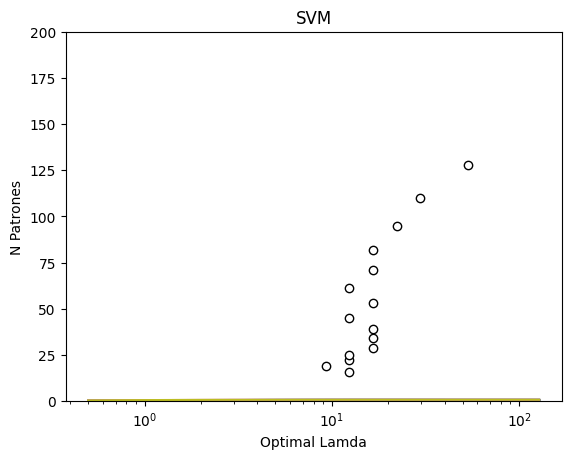

In [10]:
f, ax = plt.subplots(1)


plt.ylim([0,150])
plt.xscale('log')
plt.title("SVM")
plt.xlabel("Optimal Lamda")
plt.ylabel("N Patrones")
for i_sample in range(N_TRAIN_SAMPLES):
    plt.plot(c_values, r2_scores[i_sample])
    maxValue = np.amax(r2_scores[i_sample])
    i_maxValue = np.where(r2_scores[i_sample] == maxValue)
    print(c_values[i_maxValue][0])
    print(listTrainSamples[i_sample])
    plt.plot(c_values[i_maxValue][0], listTrainSamples[i_sample], marker = "o", markeredgecolor = "black", markerfacecolor="white")
plt.show(f)

